## BELUGA research flight segmentation

This notebook can be used to check and perform the flight segmentation for the specific research flights (RFs) 
conducted by BELUGA at Station Nord (STN).

In [1]:
import glob
import os
import sys
import warnings

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

In [2]:
src_path=os.getcwd()+"/src/"
import warnings
warnings.filterwarnings("ignore")
sys.path.insert(1,os.getcwd()+"/plotting/")
sys.path.insert(2,src_path)
sys.path.insert(3,src_path+"/processing/")
sys.path.insert(4,src_path+"/analysing/")

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout
import Performance
performance=Performance.performance()

In [3]:
import Measurement_Platforms
import beluga_plotting

In [4]:
# Definitions
matplotlib.rcParams.update({"font.size":18})
STN_coords={"lat": 81.60,
            "lon": -16.65}
main_path=os.getcwd()+"/BELUGA_data/"

flight="RF02" #individual research flight to be analysed

### Switches for things to show

In [5]:
open_met_data             = False
rerun_flight_segmentation = False
plot_flight_segmentation  = False

In [6]:
# Allocate classes and get overarching infos of all flights
Platforms_STN_cls=Measurement_Platforms.Measurement_Platforms_STN(
    main_path=main_path)
BELUGA_cls=Measurement_Platforms.BELUGA(Platforms_STN_cls)
BELUGA_cls.get_flight_information()
flight_infos=BELUGA_cls.flight_infos
flight_infos

Main path is: C:\Users\u300737\Desktop\Desktop_alter_Rechner\BELUGA_Leipzig_AC3\Code\GIT\STN_analysis/BELUGA_data/


,Date,Start Time,End Time,type,No_of_profiles,Max_height
Flight No,,,,,,
RF01,24/03/2024,2024-03-24 12:32:56,2024-03-24 14:38:13,uncategorized,8.0,378.0
RF02,24/03/2024,2024-03-24 15:33:41,2024-03-24 16:41:32,uncategorized,4.0,451.0
RF03,25/03/2024,2024-03-25 10:09:08,2024-03-25 13:56:33,uncategorized,16.0,487.0
RF04,25/03/2024,2024-03-25 15:05:26,2024-03-25 16:25:43,uncategorized,6.0,406.0
RF05,26/03/2024,2024-03-26 16:07:39,2024-03-26 18:25:35,Polar night to day,10.0,482.0
RF06,26/03/2024,2024-03-26 19:09:02,2024-03-26 21:57:37,Polar night to day,10.0,466.0
RF07,27/03/2024,2024-03-27 16:11:40,2024-03-27 17:42:30,clear to cloudy,6.0,480.0
RF08,28/03/2024,2024-03-28 09:56:12,2024-03-28 12:48:06,clear to cloudy,12.0,494.0
RF09,28/03/2024,2024-03-28 00:00:00,2024-03-28 00:00:00,uncategorized,NaN,NaN


#### Load all meteorogical campaign data (if switched on)

In [7]:
if open_met_data:
    cpgn_df=BELUGA_cls.open_all_met_data()
    cpgn_df=BELUGA_cls.calc_wspeed(cpgn_df)
    cpgn_df[cpgn_df["TEMP"]>0]=np.nan

### Perform flight segmenation for flight defined

In [8]:
if rerun_flight_segmentation:
    # Categorisation
    print("Flight segmentation for", flight)
    rf_df=BELUGA_cls.open_met_data(rf=flight)
    # Drop interrupted indexes (NAT)
    rf_df=rf_df.loc[rf_df.index.dropna()]
    rf_df.name=flight
    # Get profile maxima from research flight
    rf_df,profile_peaks = beluga_plotting.segment_flight_sections(rf_df,rate_threshold=0.1)

In [9]:
if plot_flight_segmentation:
    %matplotlib notebook
    # Plot flight segmentation
    beluga_plotting.plot_flight_segmentation(rf_df, profile_peaks)

### Overall campaign statistics

In [10]:
# Perform flight segmentation for all flights
#with HiddenPrints():
#    flight_infos,merged_rfs_df=beluga_plotting.advanced_flight_information(cpgn_df,BELUGA_cls,
#                             add_profile_infos_in_file=True, plot_segments=False)

In [11]:
# Get flight entire hours
#print("Total flight hours:", cpgn_df.shape[0]/3600)
flight_durations=flight_infos["End Time"] - flight_infos["Start Time"]
flight_durations

Flight No
RF01   0 days 02:05:17
RF02   0 days 01:07:51
RF03   0 days 03:47:25
RF04   0 days 01:20:17
RF05   0 days 02:17:56
RF06   0 days 02:48:35
RF07   0 days 01:30:50
RF08   0 days 02:51:54
RF09   0 days 00:00:00
RF10   0 days 01:24:18
RF11   0 days 03:24:26
RF12   0 days 02:13:31
RF13   0 days 02:34:57
RF14   0 days 01:41:58
RF15   0 days 03:03:38
RF16   0 days 01:18:15
RF17   0 days 02:45:58
RF18   0 days 03:00:29
RF19   0 days 02:42:01
RF20   0 days 05:23:03
RF21   0 days 02:27:56
RF22   0 days 03:12:06
RF23   0 days 03:15:23
RF24   0 days 02:29:13
RF25   0 days 04:24:06
RF26   0 days 05:45:07
RF27   0 days 04:30:06
RF28   0 days 02:30:41
dtype: timedelta64[ns]

### Total flight duration of campaign

In [15]:
print(pd.Timedelta(flight_durations.sum(),unit="hours"))

3 days 03:57:17


In [16]:
print("Total number of profiles", flight_infos["No_of_profiles"].sum())

Total number of profiles 336.0


##### Plot histogram of relative durations of specific flight segments

Figure saved as: C:\Users\u300737\Desktop\Desktop_alter_Rechner\BELUGA_Leipzig_AC3\Code\GIT\STN_analysis/plots/hist_segments.pdf


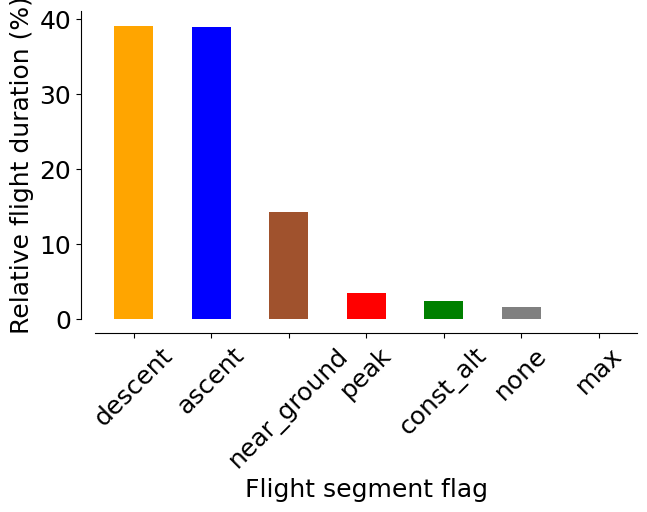

In [12]:
percentages=beluga_plotting.plot_flight_segments_histogram(merged_rfs_df)